## Data Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

#Imported the required libraries

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

#Loaded the data

In [3]:
df.head()

#The Data in our dataset

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

We have 7752 rows and 12 columns in our dataset

## EDA

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

We have float type in almost all columns except for the date column we have object type. The both target variables Next_Tmax and Next_Tmin are in float type. 

### Checking for the Null values

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
#filling the missing values for numerical terms by mean
df['station']=df['station'].fillna(df['station'].mean())
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [8]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

We still have missing values in date column.

In [9]:
import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)

In [10]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [11]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Converting all Object attributes into Numerical attributes by using LabelEncoder.

In [12]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [13]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [14]:
df.describe()      

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,735608.827012,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,11829.341785,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,735427.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,735807.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,736199.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,736671.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Text(0.5, 1.0, 'Maximum Temperature Prediction')

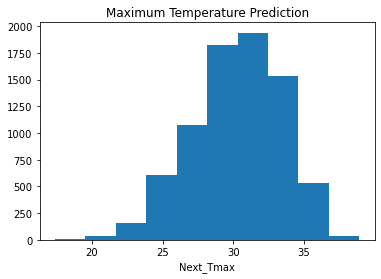

In [15]:
plt.hist(df['Next_Tmax'])
plt.xlabel('Next_Tmax')
plt.title('Maximum Temperature Prediction')

Grapgh shows distribution of data across Maximum Temperature Prediction.

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

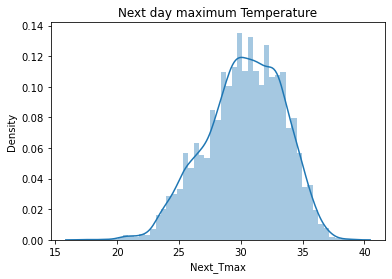

In [17]:
import seaborn as sns
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

The distplot shows that next day maximum temparature distribution is lies between 22 to 37

Text(0.5, 1.0, 'Minimum Temperature Prediction')

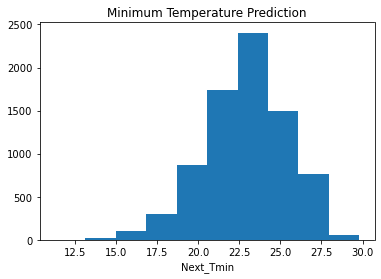

In [18]:
plt.hist(df['Next_Tmin'])
plt.xlabel('Next_Tmin')
plt.title('Minimum Temperature Prediction')

Graph shows the distribution of data across Minimum Temperature Prediction.

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

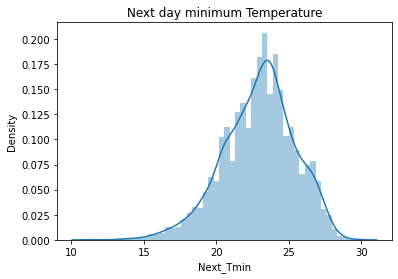

In [19]:
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

The distplot shows that next day minimum temparature distribution is lies between 15 to 28.

Text(0, 0.5, 'Next_Tmax')

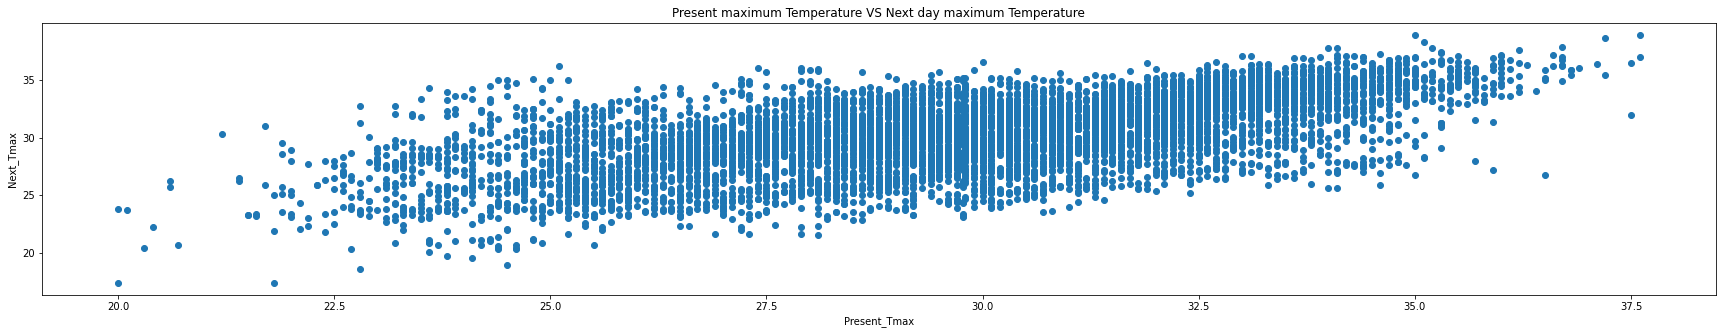

In [20]:
plt.figure(figsize=(30,5))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
plt.scatter(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

Scatterplot graph shows the distribution of data across Present maximum Temperature VS Next day maximum Temperature.

Text(0, 0.5, 'Next_Tmin')

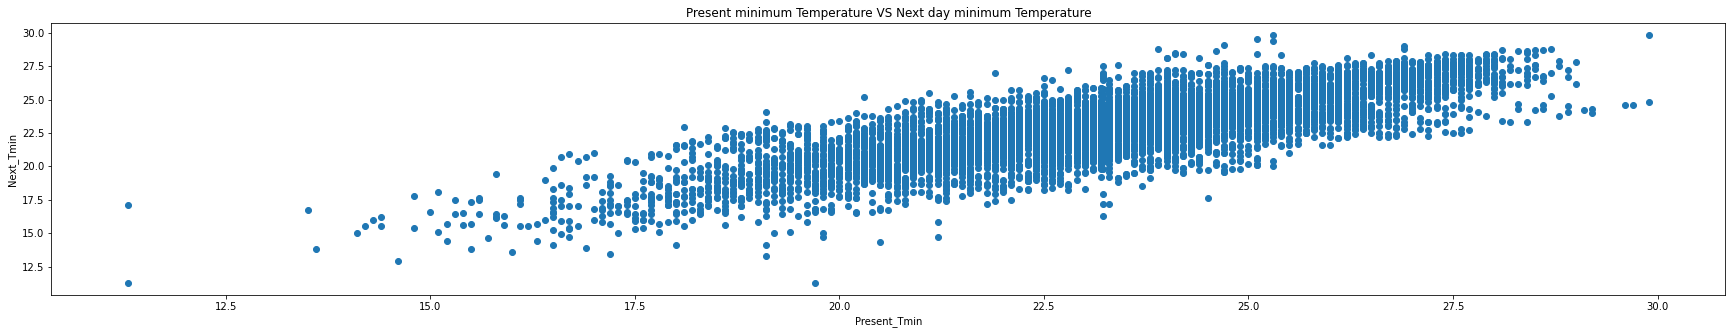

In [21]:
plt.figure(figsize=(30,5))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
plt.scatter(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

Scatterplot graph shows that distribution of data across Present minimum Temperature VS Next day minimum Temperature.

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax'>

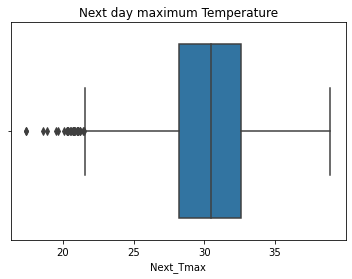

In [22]:
plt.title('Next day maximum Temperature')
sns.boxplot(df['Next_Tmax'])

As we can see that there are some outliers but we cannot remove them because these can be next day maximum temperature

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin'>

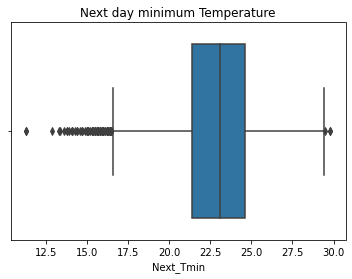

In [23]:
plt.title('Next day minimum Temperature')
sns.boxplot(df['Next_Tmin'])

As we can see that there are some outliers but we cannot remove them because these can be next day minimum temperature.

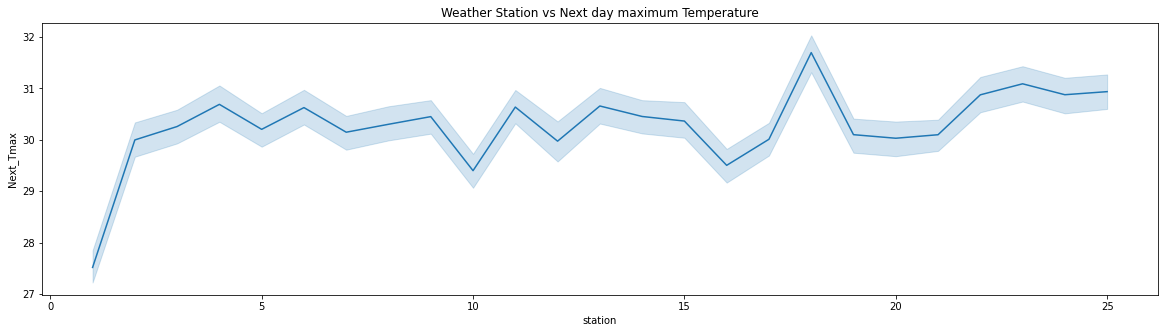

In [24]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

The line plot shows that next day maximum temparature is high & low at station 10 & 18 respectively.

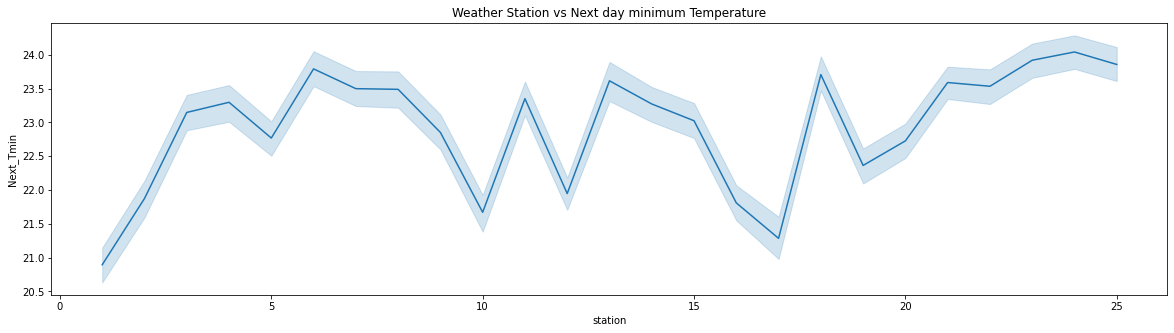

In [25]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

The line plot shows that next day minimum temparature is high & low at station 17 & 18 respectively.

Text(0, 0.5, 'Next_Tmax')

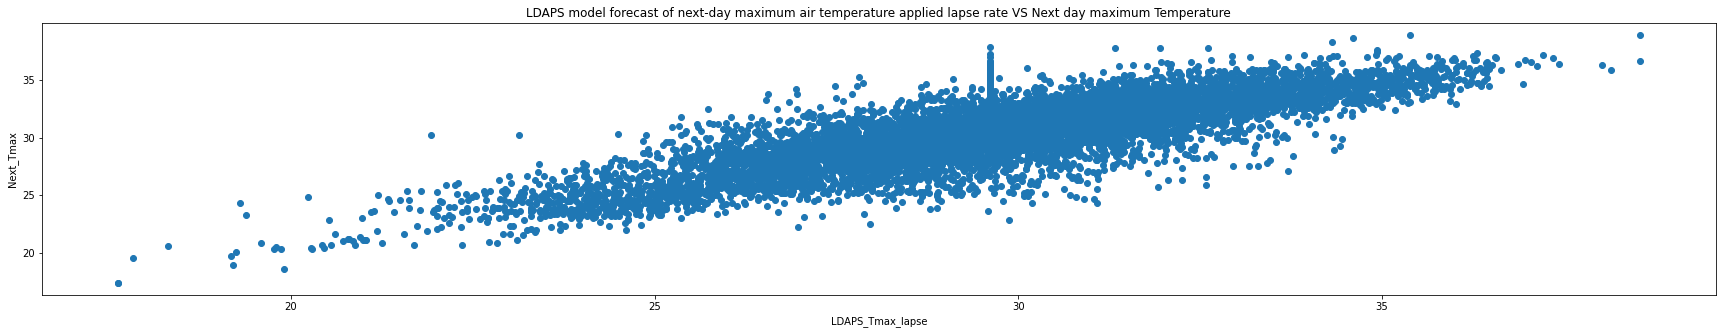

In [26]:
plt.figure(figsize=(30,5))
plt.title('LDAPS model forecast of next-day maximum air temperature applied lapse rate VS Next day maximum Temperature')
plt.scatter(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmax')

Scatterplot shows distribution of data across LDAPS model forecast of next-day maximum air temperature applied lapse rate VS Next day maximum Temperature.

Text(0, 0.5, 'Next_Tmin')

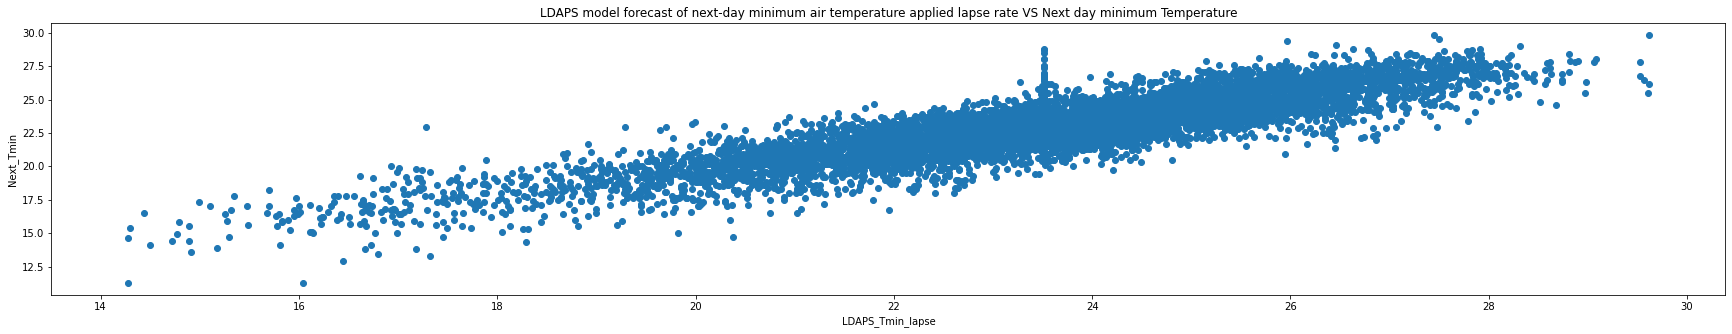

In [27]:
plt.figure(figsize=(30,5))
plt.title('LDAPS model forecast of next-day minimum air temperature applied lapse rate VS Next day minimum Temperature')
plt.scatter(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

Scatterplot shows distribution of data across LDAPS model forecast of next-day minimum air temperature applied lapse rate VS Next day minimum Temperature.

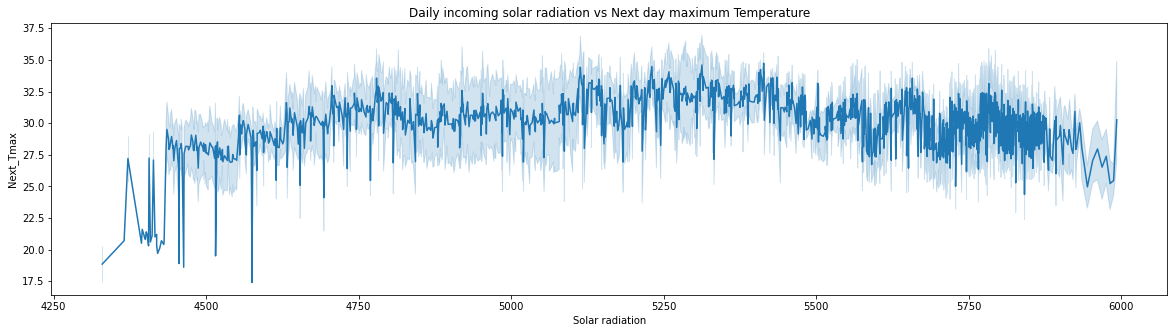

In [29]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

As per solar radiation, the next day maximum temparature is frequently increases.

Lineplot shows distribution of data across Daily incoming solar radiation vs Next day maximum Temperature.

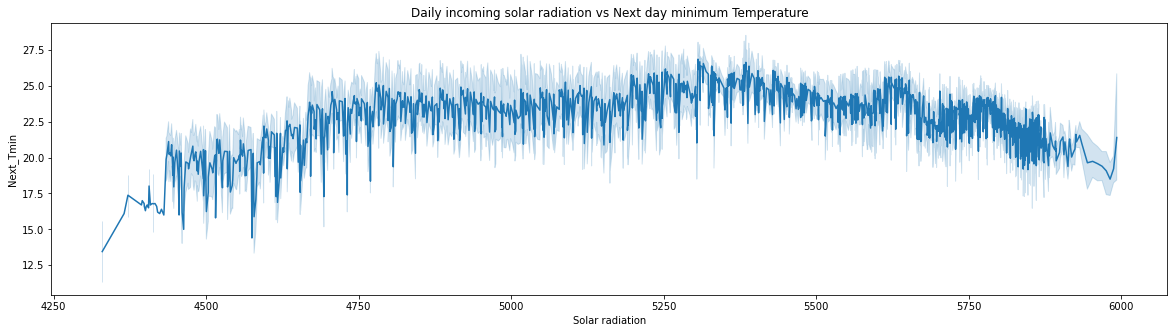

In [30]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

Lineplot shows distribution of data across Daily incoming solar radiation vs Next day minimum Temperature.

As per solar radiation, the next day minimum temparature is frequently increases.

In [31]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,735608.827012,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,11829.341785,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,735427.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,735807.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,736199.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,736671.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


<AxesSubplot:>

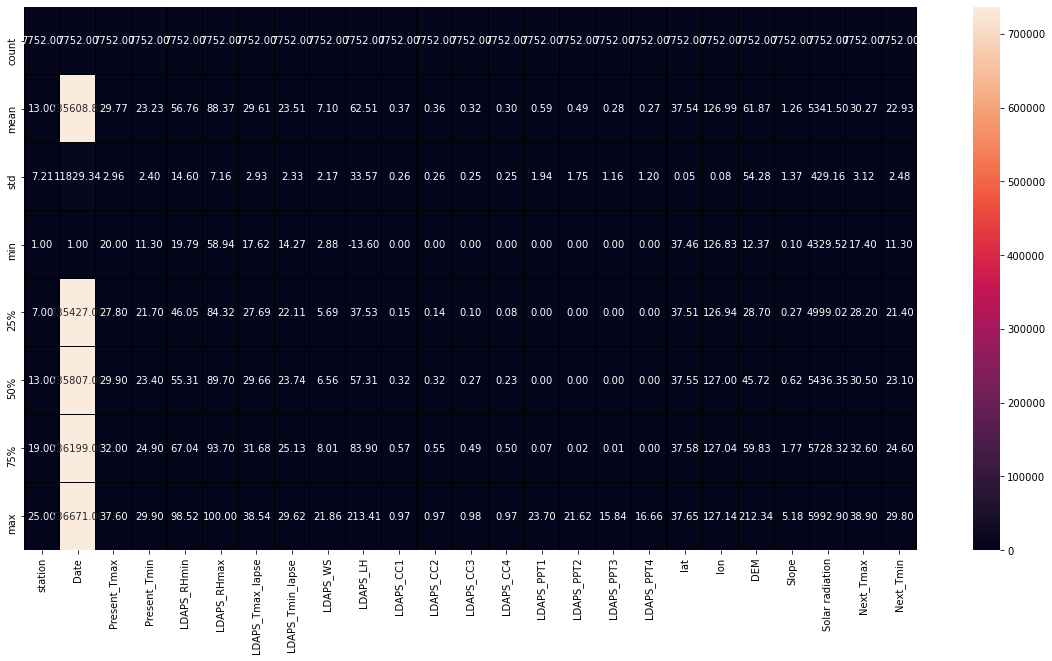

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Heatmap shows the distribution of data across all level of category

### Correlation matrix

In [34]:
dfcor=df.corr()
dfcor

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.000000,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,...,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
Date,0.000000,1.000000,0.007766,0.019074,-0.003083,0.013541,0.008840,0.010287,-0.044282,-0.015528,...,-0.096594,-0.103827,-0.106507,-0.001874,0.002202,-0.014928,-0.016177,0.004326,0.013306,0.016178
Present_Tmax,0.112655,0.007766,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,...,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,0.131646,0.019074,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,...,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.066733,-0.003083,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,...,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.166984,0.013541,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,...,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069107,0.008840,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,...,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.104758,0.010287,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,...,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,0.005277,-0.044282,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,...,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-0.133357,-0.015528,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,...,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440


 Checked Correlation in dataset

<AxesSubplot:>

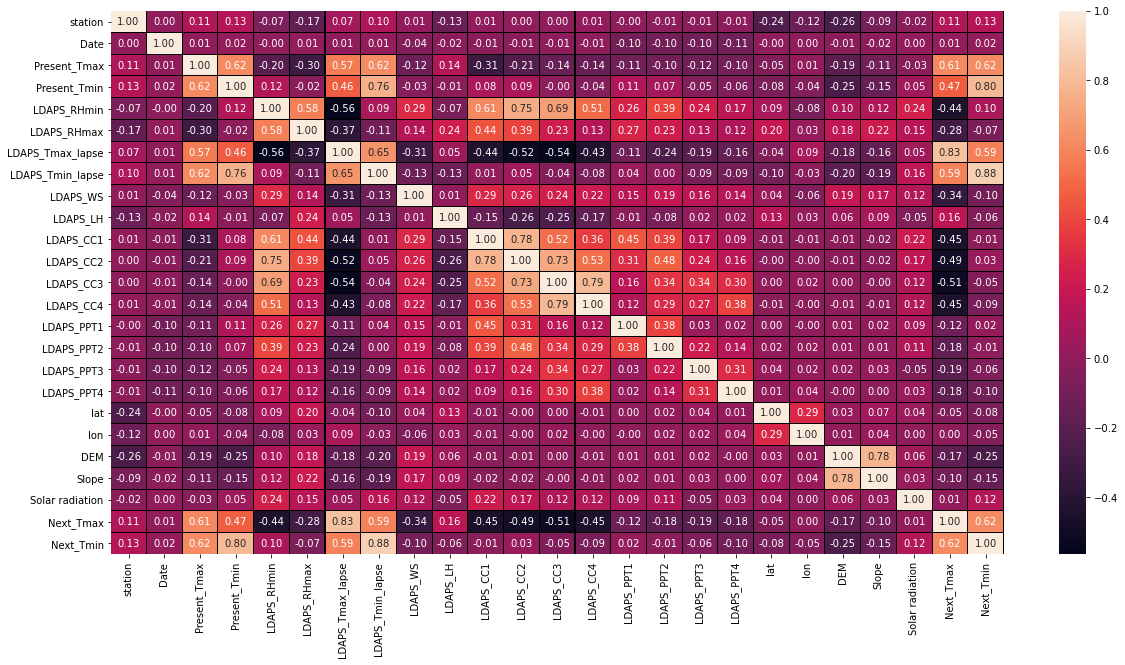

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Heatmap shows distribution of data across all level of category

### Using Z-score method to remove outliers.

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.66431530e+00, 4.73283412e-02, 3.61325771e-01, ...,
        1.51793488e+00, 3.76282142e-01, 6.97599301e-01],
       [1.52562236e+00, 4.73283412e-02, 7.21084007e-01, ...,
        1.22994952e+00, 7.20972505e-02, 1.74063574e-01],
       [1.38692941e+00, 4.73283412e-02, 6.19608090e-01, ...,
        1.21653443e+00, 2.64259847e-01, 3.89744132e-01],
       ...,
       [1.66431530e+00, 8.13430765e-02, 2.22171758e+00, ...,
        2.07432510e+00, 7.92634435e-01, 2.22793450e+00],
       [0.00000000e+00, 6.21890289e+01, 3.30412736e+00, ...,
        2.35821196e+00, 4.12345278e+00, 4.68452522e+00],
       [0.00000000e+00, 6.21890289e+01, 2.64912642e+00, ...,
        1.51793488e+00, 2.76237361e+00, 2.76579089e+00]])

In [38]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [39]:
df.shape

(7752, 25)

Checked the shape of old dataset we have 7752 rows and 25 columns

In [40]:
df_new.shape

(6894, 25)

Checked the shape of new dataset we have 6894 rows and 25 columns

In [41]:
Data_loss=((7752-6894)/7752*100)
Data_loss

11.06811145510836

After removal of outliers we have lost 11% of the dataset.

### Checking the skewness

In [49]:
df_new.skew()   

station             0.002792
Date                0.009490
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
dtype: float64

In [50]:
x= df_new.drop('Next_Tmax',axis=1)
y= df_new['Next_Tmax']

Separating the indipendent variables and target variable

### Using the Power transform to reduce the skewness in the data and the allowable skewness range is +0.5 to -0.5.

In [51]:
from sklearn.preprocessing import power_transform
df_max=power_transform(x)

df_max=pd.DataFrame(df_max,columns=x.columns)

In [52]:
df_max.skew()

station            -0.201793
Date                0.007630
Present_Tmax       -0.031861
Present_Tmin       -0.021731
LDAPS_RHmin        -0.013773
LDAPS_RHmax        -0.098610
LDAPS_Tmax_lapse   -0.011202
LDAPS_Tmin_lapse   -0.025139
LDAPS_WS            0.006111
LDAPS_LH           -0.029488
LDAPS_CC1           0.062650
LDAPS_CC2           0.047088
LDAPS_CC3           0.090316
LDAPS_CC4           0.137619
LDAPS_PPT1          1.546602
LDAPS_PPT2          1.736072
LDAPS_PPT3          1.903031
LDAPS_PPT4          2.157042
lat                 0.091387
lon                -0.189409
DEM                 0.038729
Slope               0.233805
Solar radiation    -0.166145
Next_Tmin          -0.021823
dtype: float64

In [53]:
x=df_max
x.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.871049,-1.445578,-0.480198,-0.847876,0.255239,0.347753,-0.673802,-0.357939,0.170447,0.348275,...,-0.538255,-0.498268,-0.475132,-0.428118,1.213337,-0.020409,1.854276,1.329510,1.889266,-0.823152
1,-1.658471,-1.445578,0.668526,-0.765965,-0.177754,0.259931,-0.030722,0.111292,-0.584135,-0.171949,...,-0.538255,-0.498268,-0.475132,-0.428118,1.213337,0.502989,0.069427,-0.374447,1.434120,-0.290265
2,-1.464383,-1.445578,0.555342,-0.045094,-0.448722,-0.726467,0.057585,0.364952,-0.260420,-1.388942,...,-0.538255,-0.498268,-0.475132,-0.428118,0.677101,0.841275,-0.353718,-0.943391,1.413770,0.312510
3,-1.282978,-1.445578,0.706507,-0.001324,0.254123,1.383197,-0.084189,-0.215346,-0.616421,0.243476,...,-0.538255,-0.498268,-0.475132,-0.428118,2.009404,0.374205,0.098490,1.250934,1.390562,0.490201
4,-1.111079,-1.445578,0.480519,-0.641952,0.107664,0.184230,-0.299338,-0.142691,-0.551233,1.303975,...,-0.538255,-0.498268,-0.475132,-0.428118,0.140865,1.872937,-0.279099,-0.390970,1.399661,-0.290265


In [54]:
p= df_new.drop('Next_Tmin',axis=1)
q= df_new['Next_Tmin']

Dropping the Next_Tmin in 'p' variable and other variables in "q" 

In [55]:
from sklearn.preprocessing import power_transform
df_min=power_transform(p)

df_min=pd.DataFrame(df_min,columns=p.columns)

In [56]:
df_min.skew()

station            -0.201793
Date                0.007630
Present_Tmax       -0.031861
Present_Tmin       -0.021731
LDAPS_RHmin        -0.013773
LDAPS_RHmax        -0.098610
LDAPS_Tmax_lapse   -0.011202
LDAPS_Tmin_lapse   -0.025139
LDAPS_WS            0.006111
LDAPS_LH           -0.029488
LDAPS_CC1           0.062650
LDAPS_CC2           0.047088
LDAPS_CC3           0.090316
LDAPS_CC4           0.137619
LDAPS_PPT1          1.546602
LDAPS_PPT2          1.736072
LDAPS_PPT3          1.903031
LDAPS_PPT4          2.157042
lat                 0.091387
lon                -0.189409
DEM                 0.038729
Slope               0.233805
Solar radiation    -0.166145
Next_Tmax          -0.035691
dtype: float64

In [57]:
p=df_max
p.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.871049,-1.445578,-0.480198,-0.847876,0.255239,0.347753,-0.673802,-0.357939,0.170447,0.348275,...,-0.538255,-0.498268,-0.475132,-0.428118,1.213337,-0.020409,1.854276,1.329510,1.889266,-0.823152
1,-1.658471,-1.445578,0.668526,-0.765965,-0.177754,0.259931,-0.030722,0.111292,-0.584135,-0.171949,...,-0.538255,-0.498268,-0.475132,-0.428118,1.213337,0.502989,0.069427,-0.374447,1.434120,-0.290265
2,-1.464383,-1.445578,0.555342,-0.045094,-0.448722,-0.726467,0.057585,0.364952,-0.260420,-1.388942,...,-0.538255,-0.498268,-0.475132,-0.428118,0.677101,0.841275,-0.353718,-0.943391,1.413770,0.312510
3,-1.282978,-1.445578,0.706507,-0.001324,0.254123,1.383197,-0.084189,-0.215346,-0.616421,0.243476,...,-0.538255,-0.498268,-0.475132,-0.428118,2.009404,0.374205,0.098490,1.250934,1.390562,0.490201
4,-1.111079,-1.445578,0.480519,-0.641952,0.107664,0.184230,-0.299338,-0.142691,-0.551233,1.303975,...,-0.538255,-0.498268,-0.475132,-0.428118,0.140865,1.872937,-0.279099,-0.390970,1.399661,-0.290265


## Creating Models to find out the best model

### Linear Regression Model

In [58]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
lr_max=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [59]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    lr_max.fit(x_train,y_train)
    pred_train_max=lr_max.predict(x_train)
    pred_test_max=lr_max.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:0.7887874979851399
At random state 0,the testing accuracy is:0.7665653892611173


At random state 1,the training accuracy is:0.7818238850465817
At random state 1,the testing accuracy is:0.7696810525638238


At random state 2,the training accuracy is:0.7783251160317366
At random state 2,the testing accuracy is:0.7707583637883473


At random state 3,the training accuracy is:0.7874038892689083
At random state 3,the testing accuracy is:0.7664158409819692


At random state 4,the training accuracy is:0.7647137972541778
At random state 4,the testing accuracy is:0.7771330304250761


At random state 5,the training accuracy is:0.7713490961189517
At random state 5,the testing accuracy is:0.7744091523080081


At random state 6,the training accuracy is:0.7796227945446133
At random state 6,the testing accuracy is:0.7696266790906333


At random state 7,the training accuracy is:0.7805893143591698
At random state 7,the testing accuracy is:0.7703371515558273




In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)
lr_max.fit(x_train,y_train)

LinearRegression()

In [61]:
print(lr_max.intercept_)

30.571822173162268


In [62]:
coeff_df=pd.DataFrame(lr_max.coef_,x.columns,columns=['Co-efficient'])
coeff_df

,Co-efficient
station,0.124695
Date,0.103496
Present_Tmax,0.300304
Present_Tmin,-0.024958
LDAPS_RHmin,0.122058
LDAPS_RHmax,-0.145972
LDAPS_Tmax_lapse,1.516635
LDAPS_Tmin_lapse,-0.545547
LDAPS_WS,-0.304334
LDAPS_LH,0.256561


In [63]:
pred=lr_max.predict(x_test)

In [64]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
3358,35.3,34.041260
4818,29.5,26.604244
2600,27.5,28.500539
2981,28.3,29.823295
3123,27.9,28.436090


In [65]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.082051859848112
Mean squared error: 1.9822745137523703
Root mean squared error: 1.4079327092415923


In [67]:
predict_test=lr_max.predict(x_test)
print(r2_score(y_test,predict_test)*100)

76.65653892611172


In [68]:
predict_train=lr_max.predict(x_train)
print(r2_score(y_train,predict_train)*100)

78.878749798514


Cross validation score for Linear Regression Model of Next_Tmax is 78.87%

In [69]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.5990571199425003 and accuracy score for training is 0.7887874979851399 and accuracy score for testing is 0.7665653892611173


At cross fold(j) the cv score is 0.6743908519685462 and accuracy score for training is 0.7887874979851399 and accuracy score for testing is 0.7665653892611173


At cross fold(j) the cv score is 0.6991979144676459 and accuracy score for training is 0.7887874979851399 and accuracy score for testing is 0.7665653892611173


At cross fold(j) the cv score is 0.6863717368415825 and accuracy score for training is 0.7887874979851399 and accuracy score for testing is 0.7665653892611173


At cross fold(j) the cv score is 0.688631691473992 and accuracy score for training is 0.7887874979851399 and accuracy score for testing is 0.7665653892611173


At cross fold(j) the cv score is 0.6945646634162147 and accuracy score for training is 0.7887874979851399 and accuracy score for testing is 0.7665653892611173


At cross fold(j) the cv score is 0.

The Cross validation score of Next day temparature maximum for training & testing accuracy score is 78.87% & 76.65% respectively.

### ploting with y_test vs prediction

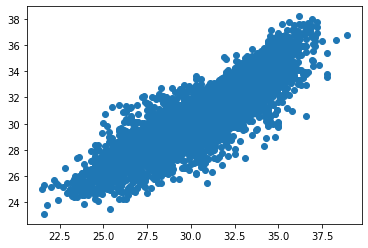

In [70]:
plt.scatter(x=y_test,y=predict_test)

Linear Regression Model for Next_Tmin

In [71]:
from sklearn.linear_model import LinearRegression
lr_min=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [72]:
for i in range(0,10):
    p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=i)
    lr_min.fit(p_train,q_train)
    pred_train_min=lr_min.predict(p_train)
    pred_test_min=lr_min.predict(p_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:0.9972666545054593
At random state 0,the testing accuracy is:0.9972238704119608


At random state 1,the training accuracy is:0.9972813902093303
At random state 1,the testing accuracy is:0.9972110532853924


At random state 2,the training accuracy is:0.9973758486658931
At random state 2,the testing accuracy is:0.9971842784937837


At random state 3,the training accuracy is:0.9974315249944552
At random state 3,the testing accuracy is:0.9971315234224197


At random state 4,the training accuracy is:0.997432282322002
At random state 4,the testing accuracy is:0.9971354913517664


At random state 5,the training accuracy is:0.997365793263441
At random state 5,the testing accuracy is:0.9971940785662251


At random state 6,the training accuracy is:0.9973698752839485
At random state 6,the testing accuracy is:0.9971613201091423


At random state 7,the training accuracy is:0.9971126051123761
At random state 7,the testing accuracy is:0.9973018958755785


At

In [73]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=6)
lr_min.fit(p_train,q_train)

LinearRegression()

In [74]:
print(lr_min.intercept_)

23.083190049092302


In [75]:
coeff_df=pd.DataFrame(lr_min.coef_,p.columns,columns=['Co-efficient'])
coeff_df

,Co-efficient
station,-0.005124
Date,-0.016761
Present_Tmax,-0.009847
Present_Tmin,0.006181
LDAPS_RHmin,0.021116
LDAPS_RHmax,0.007416
LDAPS_Tmax_lapse,0.023304
LDAPS_Tmin_lapse,-0.004007
LDAPS_WS,-0.009178
LDAPS_LH,-0.004670


In [76]:
pred=lr_min.predict(p_test)

In [77]:
df=pd.DataFrame({'Actual':q_test,'Predicted':pred})
df.head()

,Actual,Predicted
2963,21.4,21.295268
6046,24.3,24.162877
6723,27.3,27.524324
2438,24.6,24.558574
3690,21.6,21.608569


In [78]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q_test,pred))
print("Mean squared error:",mean_squared_error(q_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q_test,pred)))

error:
Mean absolute error: 0.09032176185085877
Mean squared error: 0.015625164739592804
Root mean squared error: 0.12500065895663431


In [79]:
predict_test=lr_min.predict(p_test)
print(r2_score(q_test,predict_test)*100)

99.71613201091422


In [80]:
predict_train=lr_min.predict(p_train)
print(r2_score(q_train,predict_train)*100)

99.73698752839485


Cross Validation score for Linear Regression model of Next_Tmin 99.73%.

In [81]:
Train_accuracy=r2_score(q_train,predict_train)
Test_accuracy=r2_score(q_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9965970786645115 and accuracy score for training is 0.9973698752839485 and accuracy score  for testing is 0.9971613201091423


At cross fold(j) the cv score is 0.9957502649721149 and accuracy score for training is 0.9973698752839485 and accuracy score  for testing is 0.9971613201091423


At cross fold(j) the cv score is 0.9964375522469116 and accuracy score for training is 0.9973698752839485 and accuracy score  for testing is 0.9971613201091423


At cross fold(j) the cv score is 0.9961866973437041 and accuracy score for training is 0.9973698752839485 and accuracy score  for testing is 0.9971613201091423


At cross fold(j) the cv score is 0.9956579836245396 and accuracy score for training is 0.9973698752839485 and accuracy score  for testing is 0.9971613201091423


At cross fold(j) the cv score is 0.9961992865279095 and accuracy score for training is 0.9973698752839485 and accuracy score  for testing is 0.9971613201091423


At cross fold(j) the cv scor

The Cross validation score of Next day temparature minimum for training & testing accuracy score is 99.73% & 99.71% respectively.

#### Lets plot with q_test vs prediction

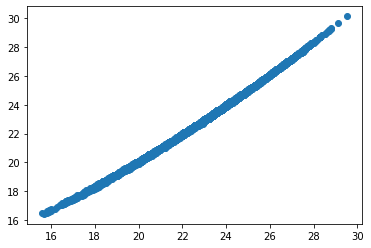

In [82]:
plt.scatter(x=q_test,y=predict_test)

## Decision Tree Regressor Model

#### Decision Tree Regressor Model for Next_Tmax

In [83]:
from sklearn.tree import DecisionTreeRegressor
dtr_max=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [84]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    dtr_max.fit(x_train,y_train)
    pred_train_max=dtr_max.predict(x_train)
    pred_test_max=dtr_max.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.6942663466286487


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.6960225515676579


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.6873167328113462


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.6872121032795335


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.7201098500780356


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.6887887726483403


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.690557584567637


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.6989239625841063


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.6739109857336565


At random s

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=1)
dtr_max.fit(x_train,y_train)

DecisionTreeRegressor()

In [86]:
pred=dtr_max.predict(x_test)

In [87]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
247,26.6,25.6
7435,28.4,28.3
1959,28.0,28.4
6975,30.0,30.3
6995,33.0,34.0


In [88]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.2017351803942238
Mean squared error: 2.70107852624459
Root mean squared error: 1.6434958248333307


In Linear Regressor model, The root mean squared error value is high so we should compare with more model.

In [89]:
predict_test=lr_max.predict(x_test)
print(r2_score(y_test,predict_test)*100)

77.15713278500456


In [90]:
predict_train=lr_max.predict(x_train)
print(r2_score(y_train,predict_train)*100)

77.79055925802638


Cross validation score for Decision tree Model of Next_Tmax 77.79%

In [91]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.5990571199425003 and accuracy score for training is 0.7779055925802638 and accuracy score for testing is 0.7715713278500457


At cross fold(j) the cv score is 0.6743908519685462 and accuracy score for training is 0.7779055925802638 and accuracy score for testing is 0.7715713278500457


At cross fold(j) the cv score is 0.6991979144676459 and accuracy score for training is 0.7779055925802638 and accuracy score for testing is 0.7715713278500457


At cross fold(j) the cv score is 0.6863717368415825 and accuracy score for training is 0.7779055925802638 and accuracy score for testing is 0.7715713278500457


At cross fold(j) the cv score is 0.688631691473992 and accuracy score for training is 0.7779055925802638 and accuracy score for testing is 0.7715713278500457


At cross fold(j) the cv score is 0.6945646634162147 and accuracy score for training is 0.7779055925802638 and accuracy score for testing is 0.7715713278500457


At cross fold(j) the cv score is 0.

The Cross validation score of Next day temparature maximum for training & testing accuracy score is 77.79% & 77.15% respectively.

### Lets plot with y_test vs prediction

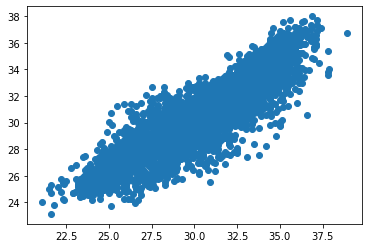

In [92]:
plt.scatter(x=y_test,y=predict_test)

### Decision Tree Regressor model for Next_Tmin

In [104]:
from sklearn.tree import DecisionTreeRegressor
dtr_min=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [105]:
for i in range(0,10):
    p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=i)
    dtr_min.fit(p_train,q_train)
    pred_train_min=dtr_min.predict(p_train)
    pred_test_min=dtr_min.predict(p_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.9990731346232997


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.9998343542796291


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.9996814842010853


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.9999418267798991


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.9996964194592648


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.9996293750302503


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.9998987356035097


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.9998863948088198


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.9999123857926949


At random 

In [106]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=2)
dtr_min.fit(p_train,q_train)

DecisionTreeRegressor()

In [107]:
pred=dtr_min.predict(p_test)

In [108]:
df=pd.DataFrame({'Actual':q_test,'Predicted':pred})
df.head()

,Actual,Predicted
1030,24.2,24.2
2043,23.2,23.2
149,21.8,21.8
6243,21.5,21.5
3602,23.1,23.1


In [111]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q_test,pred))
print("Mean squared error:",mean_squared_error(q_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q_test,pred)))

error:
Mean absolute error: 0.0036261914629137954
Mean squared error: 0.0017094902610857838
Root mean squared error: 0.04134598240561934


In [112]:
predict_test=dtr_min.predict(p_test)
print(r2_score(q_test,predict_test)*100)

99.96908523128181


In [113]:
predict_train=dtr_min.predict(p_train)
print(r2_score(q_train,predict_train)*100)

100.0


The Cross validation score for Next_Tmin 100%.

In [114]:
Train_accuracy=r2_score(q_train,predict_train)
Test_accuracy=r2_score(q_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9999117643152191 and accuracy score for training is 1.0 and accuracy score for testing 0.9996908523128181


At cross fold(j) the cv score is 0.9999035599630122 and accuracy score for training is 1.0 and accuracy score for testing 0.9996908523128181


At cross fold(j) the cv score is 0.9999169646166813 and accuracy score for training is 1.0 and accuracy score for testing 0.9996908523128181


At cross fold(j) the cv score is 0.9999121490292644 and accuracy score for training is 1.0 and accuracy score for testing 0.9996908523128181


At cross fold(j) the cv score is 0.9999195758870774 and accuracy score for training is 1.0 and accuracy score for testing 0.9996908523128181


At cross fold(j) the cv score is 0.9999355890682005 and accuracy score for training is 1.0 and accuracy score for testing 0.9996908523128181


At cross fold(j) the cv score is 0.9999075362680383 and accuracy score for training is 1.0 and accuracy score for testing 0.9996908523128181



The Cross validation score of Next day temparature minimum for training & testing accuracy score is 100% & 99.96% respectively.

### Lets plot with q_test vs prediction

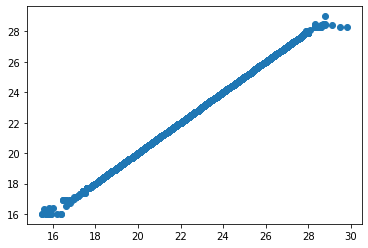

In [116]:
plt.scatter(x=q_test,y=predict_test)

### Random Forest Regressor Model

#### Random Forest Regressor model for T_max

In [117]:
from sklearn.ensemble import RandomForestRegressor
rdr_max=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [118]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    rdr_max.fit(x_train,y_train)
    pred_train_max=rdr_max.predict(x_train)
    pred_test_max=rdr_max.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test_max)}')
    print('\n')

At random state 0,the training accuracy is:0.9811779227228988
At random state 0,the testing accuracy is:0.8493624669217957


At random state 1,the training accuracy is:0.9798244954601345
At random state 1,the testing accuracy is:0.8534544698504754


At random state 2,the training accuracy is:0.9802854629740114
At random state 2,the testing accuracy is:0.8579057936196363


At random state 3,the training accuracy is:0.9812144730675619
At random state 3,the testing accuracy is:0.8514053018462293


At random state 4,the training accuracy is:0.9793280159705668
At random state 4,the testing accuracy is:0.85883784122475


At random state 5,the training accuracy is:0.9792656409768508
At random state 5,the testing accuracy is:0.8581565185175718


At random state 6,the training accuracy is:0.9812466932770946
At random state 6,the testing accuracy is:0.8578150977839514


At random state 7,the training accuracy is:0.9807949159938715
At random state 7,the testing accuracy is:0.8585963903200634


At

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=9)
rdr_max.fit(x_train,y_train)

RandomForestRegressor()

In [120]:
pred=rdr_max.predict(x_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
5305,30.0,29.840
2153,34.2,30.298
2262,30.1,29.991
4690,27.3,28.239
2248,31.3,31.672


In [121]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.8231706984953401
Mean squared error: 1.2075067169914273
Root mean squared error: 1.0988661051244721


In [122]:
predict_test=rdr_max.predict(x_test)
print(r2_score(y_test,predict_test)*100)

85.94335518871893


In [123]:
predict_train=rdr_max.predict(x_train)
print(r2_score(y_train,predict_train)*100)

98.03558621346544


The Cross validation Score for Next_Tmax 98%.

In [124]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr_max,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.6121776716219961 and accuracy score for training is 0.9803558621346543 and accuracy score for testing is 0.8594335518871893


At cross fold(j) the cv score is 0.6875161996315736 and accuracy score for training is 0.9803558621346543 and accuracy score for testing is 0.8594335518871893


At cross fold(j) the cv score is 0.6576108676782995 and accuracy score for training is 0.9803558621346543 and accuracy score for testing is 0.8594335518871893


At cross fold(j) the cv score is 0.668885748292172 and accuracy score for training is 0.9803558621346543 and accuracy score for testing is 0.8594335518871893


At cross fold(j) the cv score is 0.6605627856121089 and accuracy score for training is 0.9803558621346543 and accuracy score for testing is 0.8594335518871893


At cross fold(j) the cv score is 0.6675557891496272 and accuracy score for training is 0.9803558621346543 and accuracy score for testing is 0.8594335518871893


At cross fold(j) the cv score is 0.

The Cross validation score of Next day temparature maximum for training & testing accuracy score is 98% & 85.94% respectively.

Lets plot with y_test vs prediction

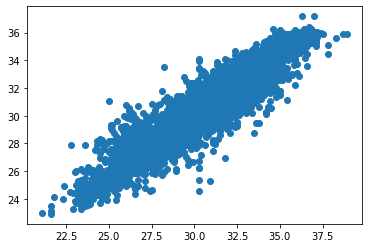

In [125]:
plt.scatter(x=y_test,y=predict_test)

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

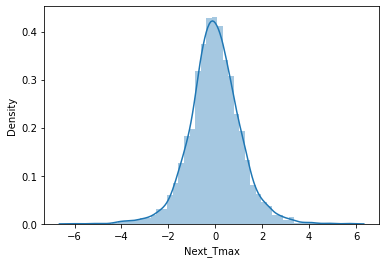

In [126]:
sns.distplot((y_test-predict_test),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

#### Random Forest Regressor model for Next_tmin

In [127]:
from sklearn.ensemble import RandomForestRegressor
rdr_min=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [128]:
for i in range(0,10):
    p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=i)
    rdr_min.fit(p_train,q_train)
    pred_train_min=rdr_min.predict(p_train)
    pred_test_min=rdr_min.predict(p_test)
    print(f'At random state {i},the training accuracy is:{r2_score(q_train,pred_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(q_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is:0.9999660006364806
At random state 0,the testing accuracy is:0.9998963968553395


At random state 1,the training accuracy is:0.9999737521677668
At random state 1,the testing accuracy is:0.9999387134180961


At random state 2,the training accuracy is:0.9999884495092443
At random state 2,the testing accuracy is:0.9996211970241633


At random state 3,the training accuracy is:0.9999766289565316
At random state 3,the testing accuracy is:0.999888037830331


At random state 4,the training accuracy is:0.9999721204578808
At random state 4,the testing accuracy is:0.9997531378949109


At random state 5,the training accuracy is:0.9999821678825135
At random state 5,the testing accuracy is:0.9998121045201802


At random state 6,the training accuracy is:0.9999746226200176
At random state 6,the testing accuracy is:0.9999673570968205


At random state 7,the training accuracy is:0.9999791395736957
At random state 7,the testing accuracy is:0.9999357056227101


A

In [129]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.7,random_state=3)
rdr_min.fit(p_train,q_train)

RandomForestRegressor()

In [130]:
pred=rdr_min.predict(p_test)
df=pd.DataFrame({'Actual':q_test,'Predicted':pred})
df.head()

,Actual,Predicted
2258,22.4,22.400
7121,27.2,27.210
2909,19.0,18.999
3832,25.7,25.700
3869,25.8,25.800


In [131]:
print("error:")
print("Mean absolute error:",mean_absolute_error(q_test,pred))
print("Mean squared error:",mean_squared_error(q_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(q_test,pred)))

error:
Mean absolute error: 0.0031762579447816176
Mean squared error: 0.0008726513710924599
Root mean squared error: 0.029540673165865058


In [132]:
predict_test=rdr_min.predict(p_test)
print(r2_score(q_test,predict_test)*100)

99.98439543937576


In [133]:
predict_train=rdr_min.predict(p_train)
print(r2_score(q_train,predict_train)*100)

99.99693218959787


Cross validation score for Tmin is 99.99%

In [136]:
Train_accuracy=r2_score(q_train,predict_train)
Test_accuracy=r2_score(q_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr_min,p,q,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is{Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.9999079366320502 and accuracy score for training is 0.9999693218959788 and accuracy score for testing is0.9998439543937576


At cross fold(j) the cv score is 0.9998951991646585 and accuracy score for training is 0.9999693218959788 and accuracy score for testing is0.9998439543937576


At cross fold(j) the cv score is 0.9999309151504078 and accuracy score for training is 0.9999693218959788 and accuracy score for testing is0.9998439543937576


At cross fold(j) the cv score is 0.9999241969978666 and accuracy score for training is 0.9999693218959788 and accuracy score for testing is0.9998439543937576


At cross fold(j) the cv score is 0.9999158219096644 and accuracy score for training is 0.9999693218959788 and accuracy score for testing is0.9998439543937576


At cross fold(j) the cv score is 0.9999328053317402 and accuracy score for training is 0.9999693218959788 and accuracy score for testing is0.9998439543937576


At cross fold(j) the cv score is 0.99992

The Cross validation score of Next day temparature minimum for training & testing accuracy score is 99.99% & 99.98% respectively

#### Lets plot with q_test vs prediction

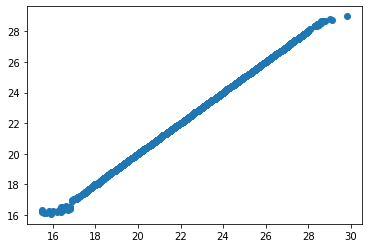

In [137]:
plt.scatter(x=q_test,y=predict_test)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

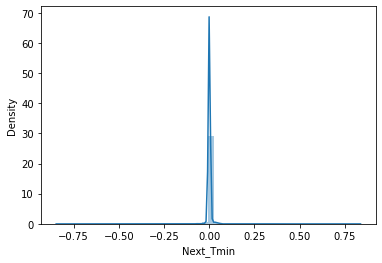

In [138]:
sns.distplot((q_test-predict_test))

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

## Hyper Parameter Tuning

#### Hyper Parameter Tuning for our best model Linear Regression of Tmax.

In [139]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [140]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
lss=r2_score(y_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: 76.94751132433697
Cross Val Score: 68.68043190923491


Hyper Parameter Tuning for Linear Regression of Tmin R2 score is 77% and CV score is 69%.

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(p_train,q_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [142]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(p_train,q_train)
ls.score(p_train,q_train)
pred_decision=ls.predict(p_test)
lss=r2_score(q_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: 99.71280897067865
Cross Val Score: 68.68043190923491


Hyper Parameter Tuning for Decision Tree Regressor of Tmax R2 Score is 99.71% and CV score is 68.9%

In [143]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),'random_state':list(range(0,10))}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [144]:
GCV.best_params_

{'max_depth': 8, 'random_state': 5}

In [145]:
dtr=DecisionTreeRegressor(max_depth=8,random_state=2)

dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_decision=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_decision)
print('R2 Score:',dtrs*100)
dtrscore=cross_val_score(dtr,x,y,cv=5)
dtrc=dtrscore.mean()
print('Cross Val Score:',dtrc*100)

R2 Score: 75.19719332574412
Cross Val Score: 52.510886562733084


Hyper Parameter Tuning for Decision Tree Regressor of Tmin R2 Score is 75% and CV score is 52%.

In [146]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),'random_state':list(range(0,10))}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(p_train,q_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [147]:
GCV.best_params_

{'max_depth': 9, 'random_state': 6}

In [148]:
dtr=DecisionTreeRegressor(max_depth=9,random_state=2)

dtr.fit(p_train,q_train)
dtr.score(p_train,q_train)
pred_decision=dtr.predict(p_test)
dtrs=r2_score(q_test,pred_decision)
print('R2 Score:',dtrs*100)
dtrscore=cross_val_score(dtr,x,y,cv=5)
dtrc=dtrscore.mean()
print('Cross Val Score:',dtrc*100)

R2 Score: 99.98714260676749
Cross Val Score: 51.304654398379476


Hyper Parameter Tuning for Random Forest Regressor of Tmax R2 score is 100% and CV Score is 51%.

In [149]:

from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt'],'random_state':list(range(0,6))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt', 'random_state': 4}


In [150]:
rdr=RandomForestRegressor(criterion='mse',max_features='sqrt',random_state=4)
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rdrs=r2_score(y_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 86.50793867965838
Cross Val Score: 67.40350736326893


Hyper Parameter Tuning for Random Forest Regressor of Tmin R2 score is 86.50% and CV score is 67.40%.

In [151]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt'],'random_state':list(range(0,5))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(p_train,q_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'random_state': 2}


In [152]:
rdr=RandomForestRegressor(criterion='mse',max_features='auto',random_state=2)
rdr.fit(p_train,q_train)
rdr.score(p_train,q_train)
pred_decision=rdr.predict(p_test)
rdrs=r2_score(q_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 99.98842316112716
Cross Val Score: 67.23212783787491


Compare with Actual Final Vs Sample Prediction for Tmax R2 score is 99.98% and CV score is 67.23%

,Y Test,Prediction
5305,30.0,22.400
2153,34.2,27.210
2262,30.1,18.999
4690,27.3,25.700
2248,31.3,25.800


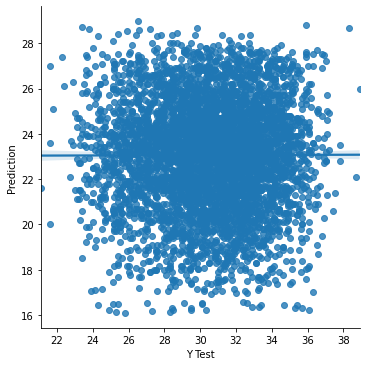

In [153]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':predict_test},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

Compare with Actual Final Vs Sample Prediction for Tmin

,Q Test,Prediction
2258,22.4,22.400
7121,27.2,27.210
2909,19.0,18.999
3832,25.7,25.700
3869,25.8,25.800


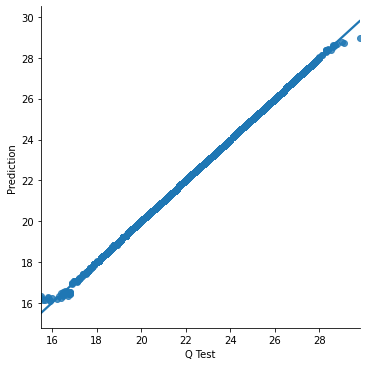

In [154]:
data=pd.DataFrame({'Q Test':q_test , 'Prediction':predict_test},columns=['Q Test','Prediction'])
sns.lmplot(x='Q Test',y='Prediction',data=data,palette='rainbow')
data.head()

### For Next Day Maximum Teparature (Next_Tmax)

### Model Saving

In [155]:
import pickle
filename='Temperature Forecast Project using ML.pkl'
pickle.dump(rdr_max, open(filename, 'wb'))

## Conclusion

In [156]:
loaded_model = pickle.load(open('Temperature Forecast Project using ML.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

85.94335518871893


In [157]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4816,4817,4818,4819,4820,4821,4822,4823,4824,4825
Predicted,29.84,30.298,29.991,28.239,31.672,29.469,29.305,31.309,29.761,32.392749,...,30.88,28.192749,31.975,27.331,25.374,32.424,34.963,31.836498,32.364,27.682
Original,22.40,27.208,18.997,25.700,25.800,16.165,20.500,18.509,23.100,23.400000,...,20.50,24.000000,24.900,24.300,20.800,26.500,23.100,22.100000,23.800,26.200


### For Next day Minimum Temparature(Next_Tmin)

### Model Saving

In [158]:
import pickle
filename='Temperature Forecast Project using ML.pkl'
pickle.dump(rdr_min, open(filename, 'wb'))

In [159]:
loaded_model = pickle.load(open('Temperature Forecast Project using ML.pkl', 'rb'))
result = loaded_model.score(p_test,q_test)
print(result*100)

99.98439543937576


### Conclusion

In [160]:
conclusion=pd.DataFrame([loaded_model.predict(p_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4816,4817,4818,4819,4820,4821,4822,4823,4824,4825
Predicted,22.4,27.210,18.999,25.7,25.8,16.207,20.5,18.508,23.1,23.4,...,20.5,24.0,24.9,24.3,20.8,26.5,23.1,22.1,23.8,26.2
Original,22.4,27.208,18.997,25.7,25.8,16.165,20.5,18.509,23.1,23.4,...,20.5,24.0,24.9,24.3,20.8,26.5,23.1,22.1,23.8,26.2
